# Preprocess

## Imports

In [1]:
import pandas as pd
import sys
sys.path.append("src/")
from visualization import mpsettings
from feng.Feature_creator import add_new_features
import matplotlib.pyplot as plt

In [2]:
import shap
from catboost import CatBoostRegressor

## Global varriables

In [3]:
PATH = "results/"
features = ["vgos","ugos","vgosa","ugosa"]
experiment ="2005_2012"

# Workspace

In [194]:
Eddy1 = pd.read_csv(PATH+experiment+".csv")

In [195]:
Eddy1 = Eddy1[~(Eddy1.Dead == "Dead")]

In [196]:
add_new_features(Eddy1)

In [197]:
f ="adt"
#TODO: Eddig ez a legbiztatóbb!!!!!

Text(0.5, 1.0, 'Eddy longevity-radius correlation\n From the Aviso 2005_2012 observation')

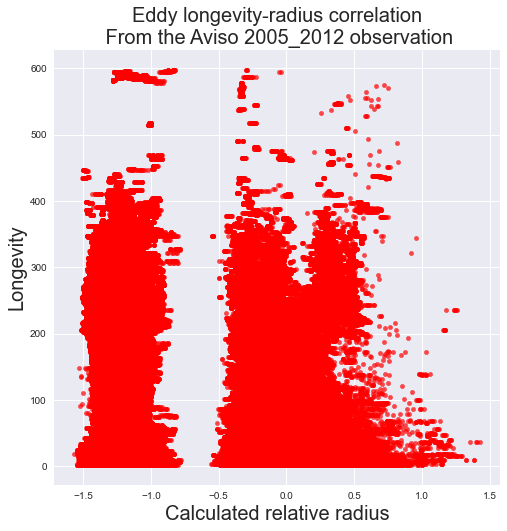

In [198]:
Eddy1[(Eddy1.Longevity > 1) &(Eddy1.Longevity < 600) ].plot.scatter(x = f,y = "Longevity", alpha = .7,color ="red")
plt.xlabel("Calculated relative radius")
plt.ylabel("Longevity")
plt.title(f"Eddy longevity-radius correlation\n From the Aviso {experiment} observation")

In [264]:
df = Eddy1[  (Eddy1.radius> 0.6)]
len(df)

2258

<AxesSubplot:xlabel='adt', ylabel='Longevity'>

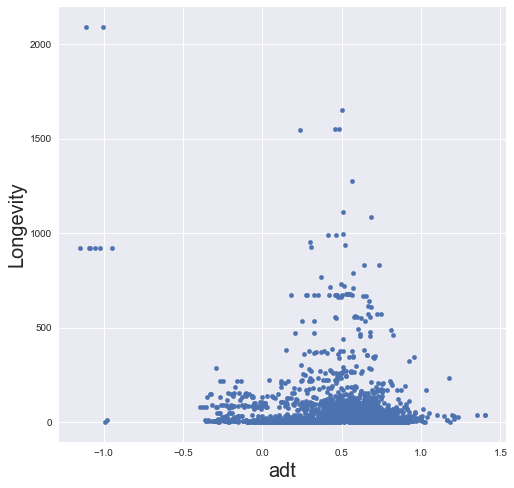

In [265]:
df.plot.scatter(x = f,y = "Longevity")

In [266]:
model = CatBoostRegressor(25000,l2_leaf_reg=7)

In [267]:
train = df.sample(int(len(df)*0.9))
test = df.drop(train.index)

In [268]:
x_train = train.drop(["Longevity","Born","Dead","latitude","longitude","Errcount"],axis=1)
y_train = train.Longevity

x_test = test.drop(["Longevity","Born","Dead","latitude","longitude","Errcount"],axis=1)
y_test = test.Longevity


In [269]:
"""
pgrid = {"iterations": [1000*_ for _ in range(1,5)],
 #'depth':[_ for _ in range(3,8)],
 'l2_leaf_reg':[3,1,5,10,100]}
model.grid_search(pgrid,x_train,y = y_train,refit =True,verbose=False,plot=True )
"""
None

In [270]:
model.fit(x_train,y_train,verbose=False,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

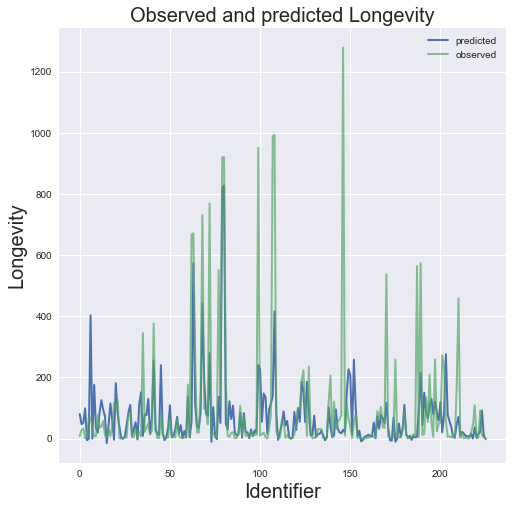

In [271]:
plt.plot(range(len(x_test)),model.predict(x_test), label = "predicted")
plt.plot(range(len(x_test)),y_test, label = "observed", alpha = .7)
plt.xlabel("Identifier")
plt.ylabel("Longevity")
plt.title("Observed and predicted Longevity")
plt.legend()

In [272]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


# Shap

In [273]:
shap.initjs()

In [274]:
identifier = 78
shap.force_plot(explainer.expected_value, shap_values[identifier,:], x_train.iloc[identifier,:])

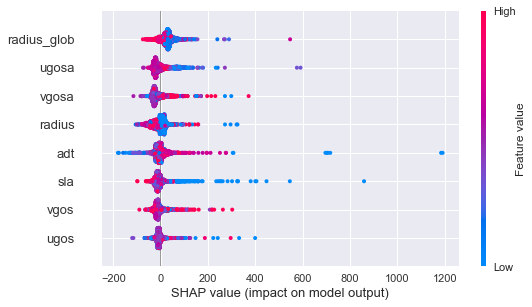

In [275]:
shap.summary_plot(shap_values,x_train)

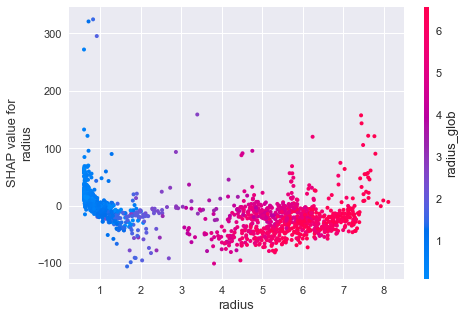

In [276]:
shap.dependence_plot("radius",shap_values,x_train)

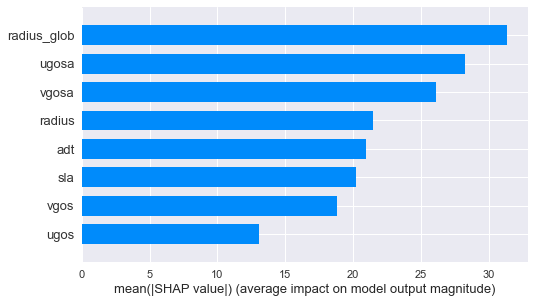

In [277]:
shap.summary_plot(shap_values,x_train,plot_type="bar")

In [223]:
model.save_model("results/catmodels/model2")